# Лабораторная работа №4. Метод Монте Карло для вычисления интегралов

## Ширяева Ольга, 4 курс, 3 группа

## Вариант 12

In [146]:
%matplotlib inline

import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

from scipy.stats import cauchy
from math import e, sin, log
from random import uniform

In [193]:
a = 1
b = 3


def integral_first(x):
    return x * sin(x) * e ** x * log(x)


i1 = integrate.quad(integrand_1, a, b)[0]
i1

17.759448446546028

In [196]:
def calculate_integral(integrand, values):
    return sum([integrand(el) for el in values]) * (b - a) / len(values)

In [198]:
def calculate_first(n=10000):
    return calculate_integral(integral_first, [uniform(1, 3) for _ in range(n)])


calculate_first()

17.91050997909911

In [199]:
def integral_second(x, y):
    return (x ** 3 + 3 * x * y) / (e ** (-y)) 

In [200]:
def x(a, b):
    return lambda: [a, b]


def bounds_y1(x):
    return [-1 - x, 0]


def bounds_y2(x):
    return [0, 1 + x]


def bounds_y3(x):
    return [-1 + x, 0]


def bounds_y4(x):
    return [0, 1 - x]


ig1 = integrate.nquad(integral_second, [bounds_y1, x(-1, 0)])[0]
ig2 = integrate.nquad(integral_second, [bounds_y2, x(-1, 0)])[0]
ig3 = integrate.nquad(integral_second, [bounds_y3, x(0, 1)])[0]
ig4 = integrate.nquad(integral_second, [bounds_y4, x(0, 1)])[0]
print(ig1 + ig2 + ig3 + ig4)
print()
print(ig1)  
print(ig2)  
print(ig3)
print(ig4)

0.0

0.04272335297134607
-0.04272335297134607
-0.25
0.25


In [201]:
def uniform_pdf2(x):
    return 0.5 if -1 <= x <= 1 else 0


def region(x, y):
    return abs(x) + abs(y) < 1


def calculate_second(x, y):
    return integral_second(x, y) 


def distribution(x, y):
    return uniform_pdf(x) * uniform_pdf(y) + 0.9


def calculate_integral2(integrand, values, distr):
    return sum([integrand(x, y) / distr(x, y) if region(x, y) else 0 for x, y in values]) / len(values)


def calculate_second(n=100000):
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    return calculate_integral2(integral_second, list(zip(x, y)), distribution)


calculate_second()

-0.0014879096448794274

In [204]:
m = 10


def get_numbers():
    return (2**x for x in range(0, 18))


def test(func):
    return [sum([func(n) for _ in range(m)]) / m for n in get_numbers()]


i1_results = test(calculate_first)
i2_results = test(calculate_second)

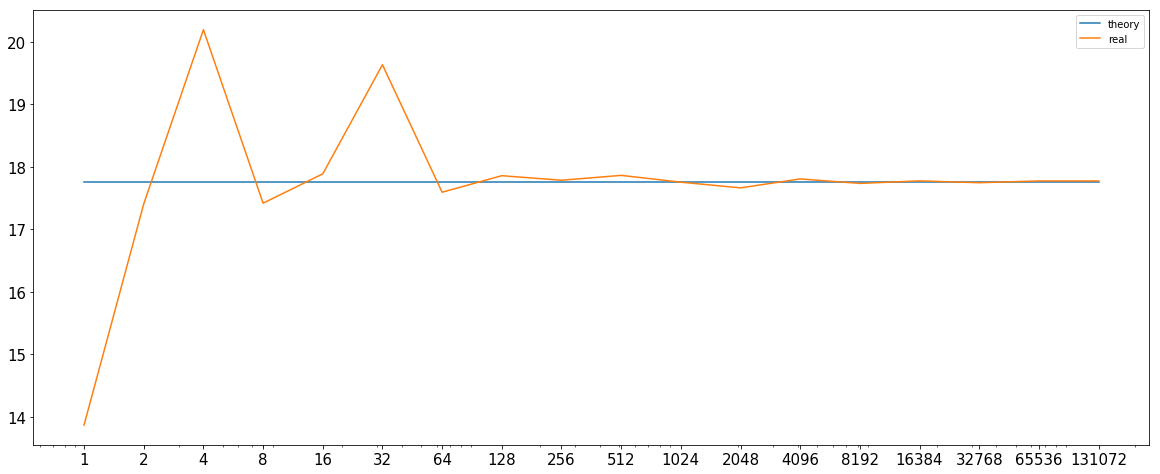

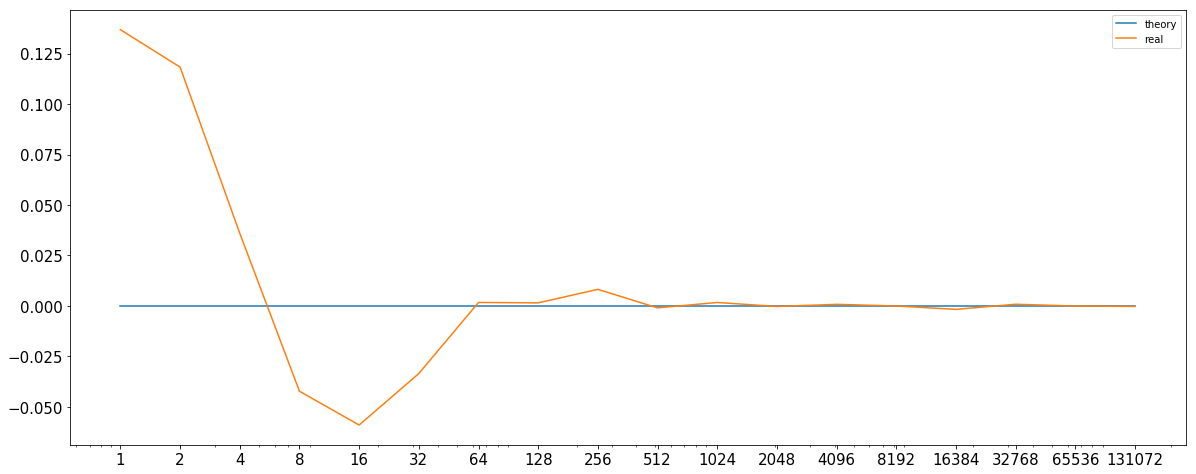

In [205]:
import matplotlib


def draw(real, theory):
    matplotlib.rc('ytick', labelsize=15)
    matplotlib.rc('xtick', labelsize=15)
    plt.figure(figsize=(20, 8))
    x = list(get_numbers())
    plt.plot(x, [theory]*len(x), label='theory')
    plt.plot(x, real, label='real')
    plt.xscale('log')
    plt.xticks(x, x)
    plt.legend()
    plt.show()


draw(i1_results, i1)
draw(i2_results, i2)